# Project 1 - Abigail Shepard      

## Introduction

The dataset chosen contains 3,196 games with 36 attributes about the endgame board position (specifically, king and rook vs. king and pawn positions) and one attribute describing whether or not white can win. The games are distributed approximately evenly between white winning and white not winning (52% or 1,669 positions white can win, 48% or 1,527 positions white cannot win). There are no missing attributes in the dataset. The dataset contains one row per position, with a sample as follows:

f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,win

For processing purposes, the end result was changed from "win" or "nowin" to "x" and "y" respectively, so each characteristic is represented by a single character.
The values of each position are binary (i.e. true or false) as is won/lost. There are thus 37 bits per row. The dataset itself does not contain the names of the features, but the format of the row is:

[bkblk, bknwy,bkon8,bkona,bkspr,bkxbq,bkxcr,bkxwp,blxwp,bxqsq,cntxt,dsopp,dwipd, hdchk,katri,mulch,qxmsq,r2ar8,reskd,reskr,rimmx,rkxwp,rxmsq,simpl,skach,skewr, skrxp,spcop,stlmt,thrsk,wkcti,wkna8,wknck,wkovl,wkpos,wtoeg]

The complete list of what each attribute represents is:

1. bkblk - the BK is not in the way
2. bknwy - the BK is not in the BR's way
3. bkon8 - the BK is on rank 8 in a position to aid the BR
4. bkona - the BK is on file A in a position to aid the BR
5. bkspr - the BK can support the BR
6. bkxbq - the BK is not attacked in some by the promoted WP
7. bkxcr - the BK can attack the critical square (b7)
8. bkxwp - the BK can attack the WP
9. blxwp - B attacks WP (BR in direction x=-1 only)
10. bxqsq - one or more Black pieces control the queening square
11. cntxt - the WK is on an edge and not on a8
12. dsopp - the kings are in normal opposition
13. dwipd - the WK distance to intersect point is too great
14. hdchk - there is a good delay because there is a hidden check
15. katri - the BK controls the intersect point
16. mulch - B can renew the check to good advantage
17. qxmsq - the mating square is attacked in some way by the promoted WP
18. r2ar8 - the BR does not have safe access to file A or rank 8
19. reskd - the WK can be reskewered via a delayed skewer
20. reskr - the BR alone can renew the skewer threat
21. rimmx - the BR can be captured safely
22. rkxwp - the BR bears on the WP(direction x=-1 only)
23. rxmsq - the BR attacks a mating square safely
24. simpl - a very simple pattern applies
25. skach - the WK can be skewered after one or more checks
26. skewr - there is a potential skewer as opposed to fork
27. skrxp - the BR can achieve a skewer or the BK attacks the WP
28. spcop - there is a special opposition pattern present
29. stlmt - the WK is in stalemate
30. thrsk - there is a skewer threat lurking
31. wkcti - the WK cannot control the intersect point
32. wkna8 - the WK is on square a8
33. wknck - the WK is in check
34. wkovl - the WK is overloaded
35. wkpos - the WK is in a potential skewer position
36. wtoeg - the WK is one away from the relevant edge

The goal of this neural network is to determine how accurately the neural network can predict the outcome of a chess game with king and rook vs. king and pawn endgame structures based on the attributes of the game position.  However, a primary goal of this project is also to apply a disciplined approach to isolating each hyperparameter independently to determine individual values and then to combine hyperparameters.  Thus, rather than simply guessing at which hyperparameters to tune, a methodical approach can be taken that will maximize accuracy and provide the best possible prediction for chess outcomes based on endgame positions.

### Preprocessing the Dataset

It was not originally expected that this dataset would need significant preprocessing because it seemed that it would be difficult to modify and shape the 36 characteristics of a chess game. While this was indeed true, the dataset was a text file that essentially held a list of the various game characteristics and the outcomes. Each row contained letters separated by commas to represent one game. 

* The first thing observation was that the outcome was recorded as "win" or "nowin", so these were changed to a single character to fit with the other characteristics. 

* Next, the commas were removed within each row to create a list of strings that represented each game.

* A nested for-loop was used to extract this data into a list of lists, which were then separated into an input list and an output list and converted to NumPy matrices. 

* While attempting to run the benchmark code after processing the data, an error was received that stated all inputs were required to be float values. 

* Each unique letter in the original list was then mapped into an integer and then proceeded to cast to floats when inputting the values into the input and output matrices. 

* Finally, the output matrix had to be reshaped so that matrix multiplication was applicable to the fit function of the neural network.

* While this was certainly less preprocessing than a more complex problem would have required, more preprocessing was necessary than had initially been expected.

<u>Importing Libraries</u>

In [1]:
import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense,Dropout
import numpy as np

from sklearn.metrics import classification_report

C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<u>Processing the Data</u>

In [2]:
#read in data
text_file = open("kr-vs-kp.data.txt", "r")
lines = text_file.read()

#since the dataset is all letters, I replaced each unique letter with a number
lines2 = lines.replace(',', '')
lines3 = lines2.replace('won','0')
lines4 = lines3.replace('nowin','1')
lines5 = lines4.replace('f','2')
lines6 = lines5.replace('t','3')
lines7 = lines6.replace('w','4')
lines8 = lines7.replace('n','5')
lines9 = lines8.replace('g','6')
lines10 = lines9.replace('b','7')
lines11 = lines10.replace('l','8')
line_split = lines11.split()
list1 = []
#converting from list of strings to list of lists
for line in line_split:
    list2 = []
    for data in line:
        #converting integers to floats for processing
        list2.append(float(data))
    list1.append(list2)
#changing list of lists into numpy array
data_matrix = np.array(list1)
for i in range(len(data_matrix)):
    for j in range(len(data_matrix[0])):
        #changing to floats
        data_matrix[i][j] = float(data_matrix[i][j])
        
#creating output array    
y = []
for i in range(len(data_matrix)):
    y.append(data_matrix[i][36])

#creating a separate X matrix and y matrix for inputs and outputs
y = np.array(y) 
y = np.reshape(y,(len(y), 1))
X = np.delete(data_matrix,36,axis=1)

##separating into train, test, validation
train_val_X, testX, train_val_Y, testY = train_test_split(X, y, train_size=0.75, random_state=1)
trainX, valX, trainY, valY = train_test_split(train_val_X, train_val_Y, train_size=0.5, random_state=1)

# reshape into vectors
trainX = trainX.reshape((trainX.shape[0], 36 * 1))
valX = valX.reshape((valX.shape[0], 36 * 1))
testX = testX.reshape((testX.shape[0], 36 * 1))

# convert the labels to one-hot form
trainY = to_categorical(trainY)
valY = to_categorical(valY)
testY = to_categorical(testY)

### Experimental Design

For the experimental design, it was planned to compare and contrast different hyperparameters such as activation functions, optimizers, regularization methods, neural architectures, initializers, and loss functions to achieve the highest performance of the neural network. 

To begin, benchmark code was run to establish a baseline of performance in the absence of as many hyperparameters as possible: a simple neural network with no hyperparameters besides a Logistic loss function for classification. 

For the neural architecture, an input shape was used with 2 hidden layers and an output layer that predicts either one of two possible outcomes. Since the dataset is fairly simple, only 2 hidden layers are necessary to separate the data non-linearly. More layers are used for more complex datasets.

From this benchmark code, each hyperparameter will be changed one at a time to isolate the effects of each hyperparameter. Each hyperparameter alternative will be run for 1000 epochs, the full listing of which is contained in the appendix section of this report. 

In the body of this report, a sample set of hyperparameter runs will be executed for 100 epochs to improve readability.  Accuracies may therefore be slightly different. The final numbers in the report will be based on results from the runs with 1,000 epochs in the appendix, not the 100 epochs in the report.  Additionally, the final run with 1,000 epochs will be contained in this report for completeness.

## The Experiment

The following tests were used to conduct the experiment to determine the best combination of hyperparameters to model this problem. 

1. Benchmark Model

<u>Runs to Isolate Influence of Hyperparameters</u>

2. Binary Cross-Entropy Loss Function
3. Relu Activation Function
4. Sigmoid Activation Function for All Layers
5. Tanh Activation Function
6. Stochastic Gradient Descent Optimizer
7. Adam Optimizer
8. RMSprop Optimizer
9. Glorot Uniform Initializer
10. Glorot Normal Initializer
11. He Normal Initializer
12. Additional Hidden Layer
13. Additional Neurons per Layer
14. Additional Neurons per Layer as well as Additional Hidden Layer

<u>Additional Runs with Combined Hyperparameters</u>

15. Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform
16. Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal
17. Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal
18. Sigmoid with Glorot Uniform, Relu with He Uniform, and Glorot Uniform
19. L2 Regularization
20. Dropout Regularization

The full listing for these models and runs with 1,000 epochs is in the appendix of this report.  The summary of these runs in the main body of this report illustrates a subset of these runs with 100 epochs for readability:

<u>Single Hyperparameter Variations</u>

1. Benchmark model (Simple neural network with no hyperparameters besides a Logistic loss function for classification)
2. Example of a Single Hyperparameter Loss Function (Binary Cross-Entropy)
3. Example of an Single Hyperparameter Architectural Alternative (Additional Neurons and Layers)
4. Example of an Single Hyperparameter Optimizer (Adam Optimizer)

<u>Multiple Hyperparameter Variation</u>

5. Combination of Hyperparameters (Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform)


### Benchmark Model (Illustration with 100 Epochs)

The benchmark model was a simple neural network with no hyperparameters besides a Logistic loss function for classification.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               9472      
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 1s 10ms/step - loss: 0.2716 - accuracy: 0.5125 - val_loss: 0.2402 - val_accuracy: 0.5229
Epoch 2/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2402 - accuracy: 0.5192 - val_loss: 0.2402 - val_accuracy: 0.5229
Epoch 3/100
38/38 [============

C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

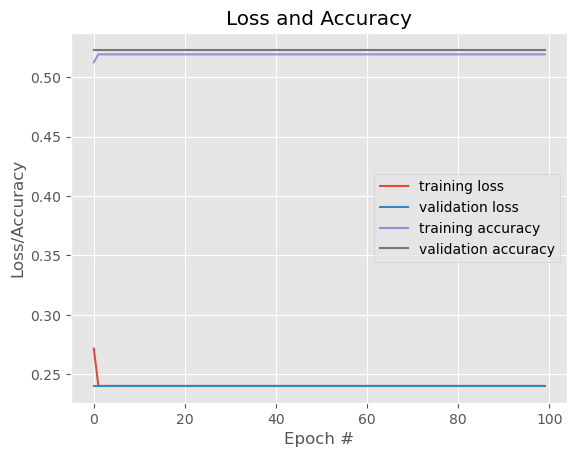

In [8]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2)) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'mean_squared_logarithmic_error', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 3
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

After running the benchmark code with no hyperparameters, it was observed that the model stopped learning after 2 epochs at a test accuracy of 47%. A further test was planned for a variety of hyperparameters to improve the accuracy of the model. 

1. Loss functions - logistic classification (benchmark), binary cross-entropy
2. Activation Functions - Sigmoid, Relu, Tanh
3. Optimizers - Adam, SGD, RMSprop
4. Initializers - Glorot uniform, Glorot normal, he uniform, he normal
5. Regularizers - l2, dropout, and early stopping
6. Neural Architectures - more layers, more neurons in each layer, more layers with more neurons

In terms of loss functions, the decision was made to test the binary cross-entropy loss because the output of the neural network is a binary decision, either one option or the other. When the loss function was changed to binary cross-entropy, the test accuracy increased from 90% to 95%. The use of binary cross-entropy continued for the remainder of the runs.

Since this loss function was used, the output layer would use the Sigmoid activation function for the binary classification. For testing activation functions, the Sigmoid was used for all layers, Relu (most widely used), and Tanh (inputs are emphasized).

For optimizers, Adam was tested (utilizes momentum, step sizes bounded by hyperparameter, the network should converge more quickly), Stochastic Gradient Descent (advanced gradient descent with batches), and RMSprop (gradient descent with momentum).

Glorot and He are the typical initialization functions, so these were each tested as both a normal distribution and a uniform distribution to see if this affected the accuracy of the network.

Large neural networks tend to overfit the training data and perform worse on the test data, so regularization techniques were planned to be used if this were to happen. L2 regularization tends the weights to 0 to decrease the difference between training and test accuracy. Dropout removes a proportion of training data, so the model has less ability to overfit the training data. Early stopping involves the model ending when the validation accuracy stops increasing, reducing the chance of overfitting. However, as this was testing some of the previous hyperparameters, the accuracy remained constant at approximately 97% without any overfitting. When this was observed, a decision was made not to test any regularization methods because it did not seem that overfitting would be a problem for this network and this dataset.

Lastly, a variety of different neural architectures were tested. In the first pass, the number of neurons was increased in my existing layers.  The second pass added another hidden layer with a smaller number of neurons, and the final pass added another hidden layer and increased the neurons in each layer.

### Examples of Runs for Isolating Effect of Each Hyperparameter

<u>2. Testing binary crossentropy. Performed much higher than logistic classifcation.</u>

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 256)               9472      
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 1.1172 - accuracy: 0.5492 - val_loss: 0.9719 - val_accuracy: 0.4771
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.7114 - accuracy: 0.5810 - val_loss: 0.5070 - val_accuracy: 0.8140
Epoch 3/100
38/38 [=============

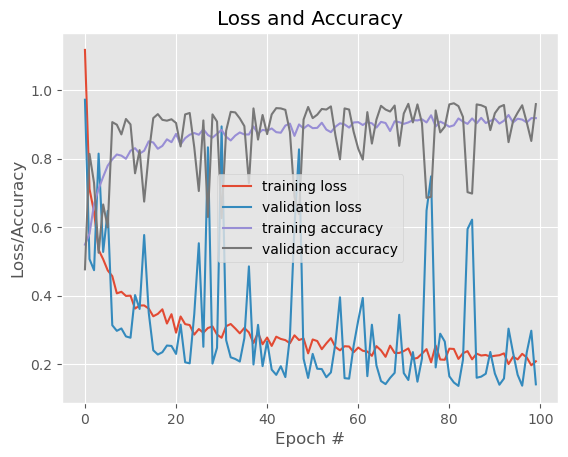

In [12]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>3. Adding another hidden layer and increasing number of neurons in each layer. Resulted in a signifcantly lower accuracy.</u>

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1024)              37888     
                                                                 
 dense_22 (Dense)            (None, 512)               524800    
                                                                 
 dense_23 (Dense)            (None, 256)               131328    
                                                                 
 dense_24 (Dense)            (None, 2)                 514       
                                                                 
Total params: 694,530
Trainable params: 694,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 2s 21ms/step - loss: 1.9891 - accuracy: 0.5643 - val_loss: 0.6796 - val_accuracy: 0.5013
Epoch 2/100
38/38 [===================

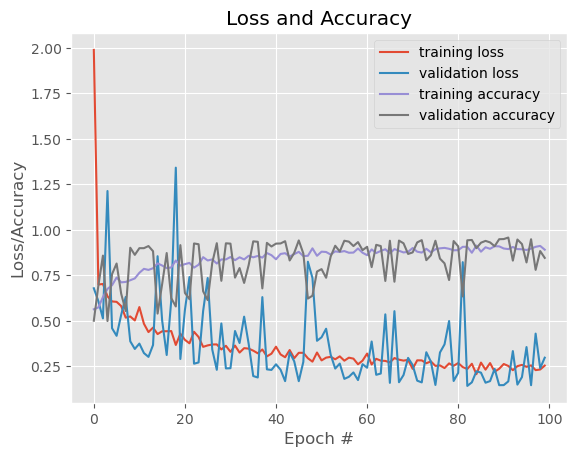

In [13]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(1024, input_shape=(36,)))
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>4. Using Adam optimizer. Increased test accuracy to 97% and performed better than all other optimizer options.</u>

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               9472      
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 1s 10ms/step - loss: 0.7490 - accuracy: 0.6185 - val_loss: 0.5560 - val_accuracy: 0.7189
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.7688 - val_loss: 0.5600 - val_accuracy: 0.6364
Epoch 3/100
38/38 [============

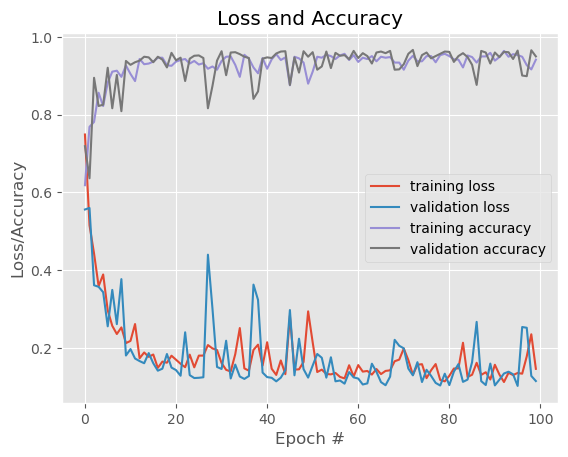

In [15]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

### Second set of runs, combining chosen hyperparameters

After testing each isolated hyperparameter, the results of each class were compared:

**Loss:**
Binary Cross-Entropy: 95% accuracy
Logistic Classification: 90% accuracy

**Activation Functions:**
Relu: 98% accuracy
Sigmoid: 99% accuracy
Tanh: 99% accuracy

**Optimizers:**
Adam: 97% accuracy
SGD: 53% accuracy
RMSprop: 95% accuracy

**Initializers:**
Glorot Uniform: 97% accuracy
Glorot Normal: 97% accuracy
He Uniform: 97% accuracy
He Normal: 97% accuracy

**Architectures:**
Original: 95% accuracy
More layers: 94% accuracy
More neurons: 94% accuracy
More layers and more neurons: 87% accuracy

When considering these results, Binary Cross-Entropy was the better loss function, Adam was the best optimizer, and the original neural architecture performed the best. However, the activation functions and initializers did not have clear results as to which one had the greatest accuracy.

When combining hyperparameters, a decision was always made to combine Glorot initialization with Tanh and Sigmoid activation functions together because Tanh and Sigmoid map inputs from 0 to 1, which were necessary for this classification problem. The He initialization was also kept with the Relu activation function because Relu maps the absolute value of inputs.

Essentially, tests included a combination of Tanh, Sigmoid, and Relu activation functions with their respective Glorot or He initializer with either a Normal or Uniform distribution to find the best accuracy.

Combined hyperparameter runs were executed as:

1. Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform
2. Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal
3. Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal
4. Sigmoid with Glorot Uniform, Relu with He Uniform, and He Uniform

However, after running the first two tests, it was evident that the model was indeed now overfitting. While testing each individual parameter did not cause the model to overfit, combining the hyperparameters resulted in observable overfitting. After the first two runs, some tests of regularization techniques were completed on the original model with the Binary Cross-Entropy loss function. Using L2 regularization completely eliminated the overfitting but dropped the accuracy to approximately 93%. Testing dropout resulted in lower overfitting (not completely eliminated) but with much higher accuracy of 98%. 

Finally, two other runs were completed with the intent of choosing the best of the 4 runs and applying Dropout for the final run.

### Example Run of Combining Hyperparameters (Illustration with 100 Epochs)

<u>5. Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform. 99% Accuracy but with some overfitting.</u>

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 256)               9472      
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
38/38 [==============================] - 1s 9ms/step - loss: 0.6795 - accuracy: 0.5634 - val_loss: 0.6522 - val_accuracy: 0.5288
Epoch 2/100
38/38 [==============================] - 0s 4ms/step - loss: 0.6062 - accuracy: 0.6945 - val_loss: 0.5594 - val_accuracy: 0.6922
Epoch 3/100
38/38 [============

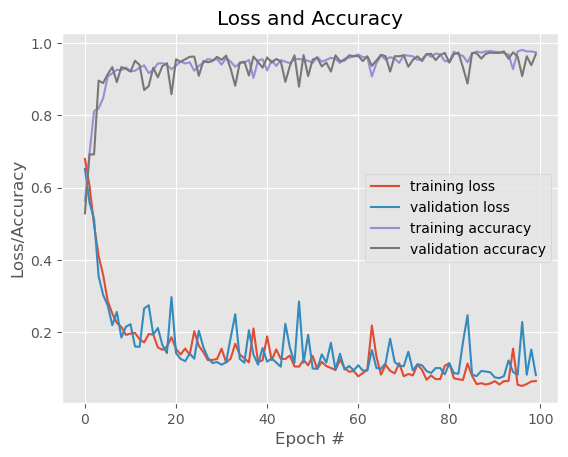

In [17]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_uniform',))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 100
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

After testing 4 runs of combined hyperparameters, the results were as follows:

1. Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform: 99% Accuracy
2. Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal: 99% Accuracy
3. Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal: 98% Accuracy
4. Sigmoid with Glorot Uniform, Relu with He Uniform, and Glorot Uniform: 99% Accuracy

Although runs 1, 2, and 4 all had 99% accuracy, the graph of Run 4 showed the least amount of overfitting.  Therefore, run 4 was used with Dropout layers for the final run to reduce overfitting.

## Final Run

The final run was completed with 1,000 epochs using a model with Binary Cross-Entropy, the Adam Optimizer, a combination of Sigmoid and Relu activation functions with Glorot Uniform and He uniform initializers and Dropout regularization. This model produced 99% accuracy for both training and test datasets, with the least overfitting.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               9472      
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================

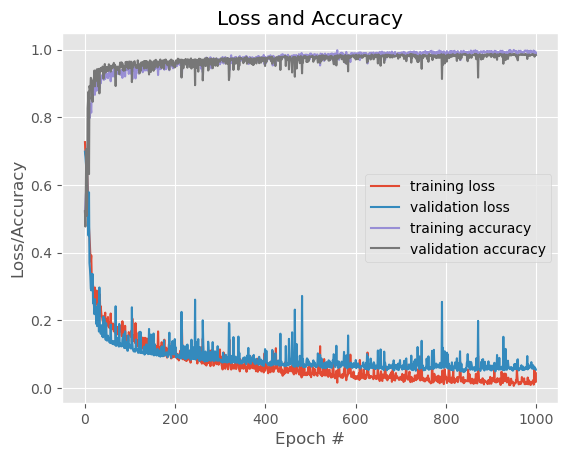

In [4]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'sigmoid', kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dropout(0.15))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## Conclusion

From the start, I approached the problem as a controlled scientific experiment by isolating each hyperparameter as an independent variable, with its resulting effect on the accuracy of the neural network as the dependent variable (the accuracy of the neural.

To summarize, the original plan was to test each of the following hyperparameters:

1. Loss functions - Logistic Classification (Benchmark), Binary Cross-entropy
2. Activation Functions - Sigmoid, Relu, Tanh
3. Optimizers - Adam, SGD, RMSprop
4. Initializers - Glorot Uniform, Glorot Normal, He Uniform, He Normal
5. Regularizers - L2, Dropout, and Early Stopping
6. Neural Architectures - additional layers, additional neurons per layer, additional layers and neurons

When testing the hyperparameters, since there did not appear to be any overfitting of the model, no further testing of the regularization techniques appeared to be necessary.

After isolating each of these hyperparameters and analyzing the results, the decision was made to test four combinations based on the results achieved during each isolated run.  It was quickly discovered that when combining the parameters, regularization was needed, so the decision was made to proceed to test L2 and Dropout, resulting in Dropout providing the best accuracy with a smaller amount of overfitting.

The four runs of hyperparameter combinations were:

1. Tanh with Glorot unifrom, Sigmoid with Glorot Uniform, and Glorot Uniform
2. Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal
3. Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal
4. Sigmoid with Glorot Uniform, Relu with He Uniform, and Glorot Uniform

Ultimately, it was discovered that a model with Binary Cross-Entropy, the Adam Optimizer, a combination of Sigmoid and Relu activation functions with Glorot Uniform and He uniform initializers and Dropout regularization provided the best accuracy.

This approach was helpful in determining the individual contribution of each hyperparameter in order to make the best choice regarding combinations of hyperparameters.

The final model was able successfully to predict the outcome of a chess game for the endgame of king and pawn vs. king and rook at a 99% accuracy on test data.

## Appendix of All Runs

Models and model outputs for all runs are below.

1. Benchmark Model

Runs to Isolate Influence of Hyperparameters

2. Binary Cross-Entropy Loss Function
3. Relu Activation Function
4. Sigmoid Activation Function for All Layers
5. Tanh Activation Function
6. Stochastic Gradient Descent Optimizer
7. Adam Optimizer
8. RMSprop Optimizer
9. Glorot Uniform Initializer
10. Glorot Normal Initializer
11. He Normal Initializer
12. Additional Hidden Layer
13. Additional Neurons per Layer
14. Additional Neurons per Layer as well as Additional Hidden Layer

Additional Runs with Combined Hyperparameters

15. Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform
16. Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal
17. Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal
18. Sigmoid with Glorot Uniform, Relu with He Uniform, and Glorot Uniform
19. L2 Regularization
20. Dropout Regularization

<u>Benchmark Model</u>

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               9472      
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.2483 - accuracy: 0.4841 - val_loss: 0.2402 - val_accuracy: 0.4771
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.2402 - accuracy: 0.4808 - val_loss: 0.2402 - val_accuracy: 0.4771
Epoch 3/1000
38/38 [==========

C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

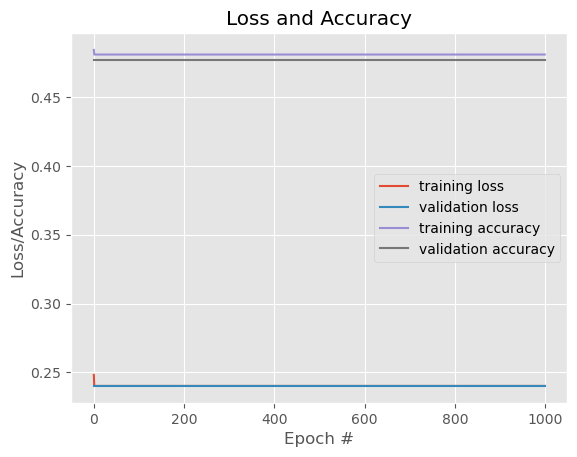

In [10]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2)) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'mean_squared_logarithmic_error', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## Runs to Isolate Influence of Hyperparameters

<u>Binary Cross-Entropy Loss Function</u>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               9472      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 1.1109 - accuracy: 0.5584 - val_loss: 0.6403 - val_accuracy: 0.5546
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.7486 - accuracy: 0.6235 - val_loss: 0.5175 - val_accuracy: 0.8173
Epoch 3/1000
38/38 [==========

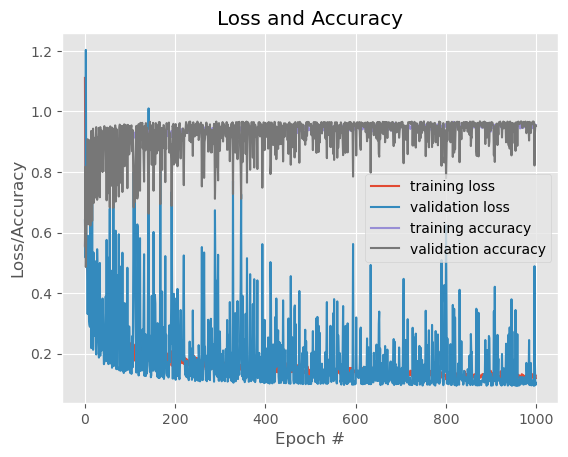

In [7]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Relu Activation Function</u>

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               9472      
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dense_50 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 0.7126 - accuracy: 0.5526 - val_loss: 0.6585 - val_accuracy: 0.5354
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.6473 - accuracy: 0.6336 - val_loss: 0.6119 - val_accuracy: 0.5847
Epoch 3/1000
38/38 [========

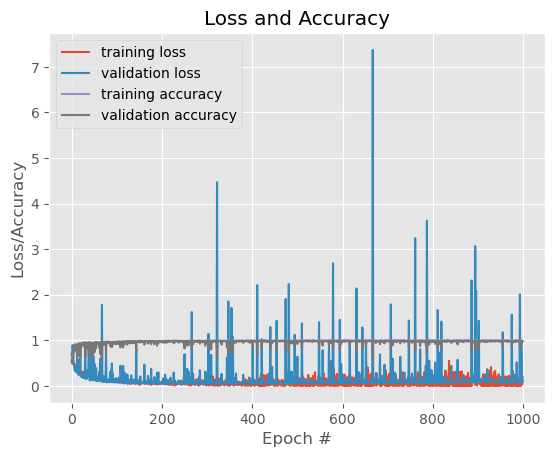

In [23]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'relu', input_shape=(36,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()



<u>Sigmoid Activation Function for All Layers</u>

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 256)               9472      
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dense_65 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 0.7065 - accuracy: 0.5167 - val_loss: 0.7248 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5409 - val_loss: 0.6761 - val_accuracy: 0.8082
Epoch 3/1000
38/38 [========

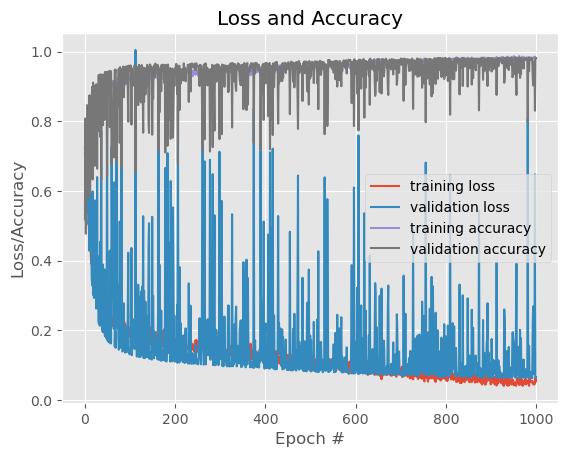

In [28]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'sigmoid', input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid'))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()



<u>Tanh Activation Function</u>

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 256)               9472      
                                                                 
 dense_67 (Dense)            (None, 128)               32896     
                                                                 
 dense_68 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.7308 - accuracy: 0.5693 - val_loss: 0.7725 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.6372 - accuracy: 0.6419 - val_loss: 0.5299 - val_accuracy: 0.7364
Epoch 3/1000
38/38 [=========

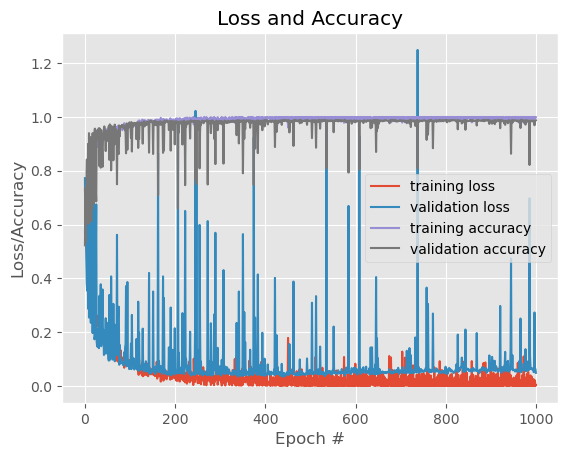

In [29]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', input_shape=(36,)))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()



<u>Stochastic Gradient Descent Optimizer</u>

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 256)               9472      
                                                                 
 dense_58 (Dense)            (None, 128)               32896     
                                                                 
 dense_59 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: nan - accuracy: 0.5209 - val_loss: nan - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.5192 - val_loss: nan - val_accuracy: 0.5229
Epoch 3/1000
38/38 [====================

C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abbie\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

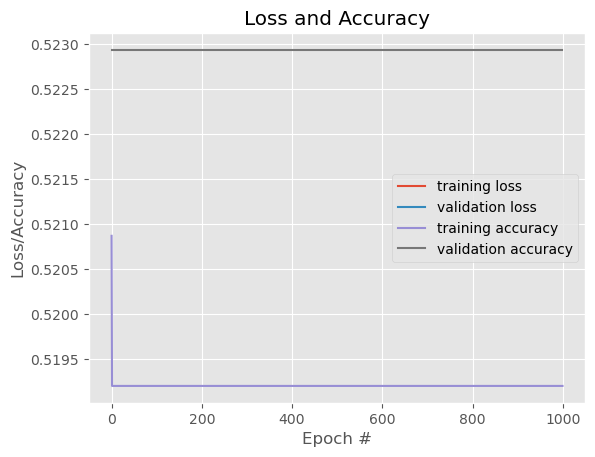

In [26]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', optimizer = SGD(0.3), metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Adam Optimizer</u>

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 256)               9472      
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.8457 - accuracy: 0.5292 - val_loss: 0.5957 - val_accuracy: 0.8098
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.5513 - accuracy: 0.7721 - val_loss: 0.4876 - val_accuracy: 0.7982
Epoch 3/1000
38/38 [=========

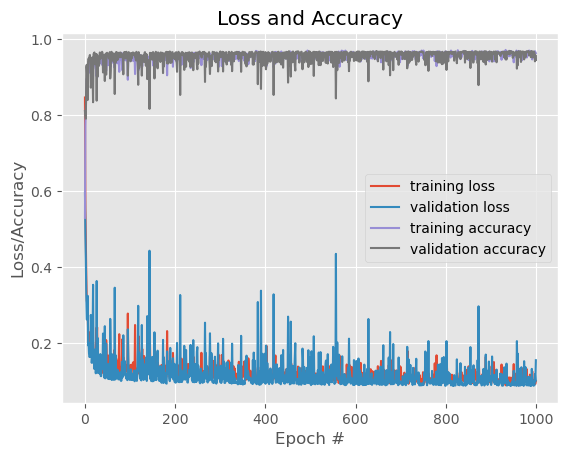

In [16]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>RMSprop Optimizer</u>

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 256)               9472      
                                                                 
 dense_61 (Dense)            (None, 128)               32896     
                                                                 
 dense_62 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 1.1004 - accuracy: 0.5284 - val_loss: 0.7418 - val_accuracy: 0.4904
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.7284 - accuracy: 0.6277 - val_loss: 0.6371 - val_accuracy: 0.5838
Epoch 3/1000
38/38 [=========

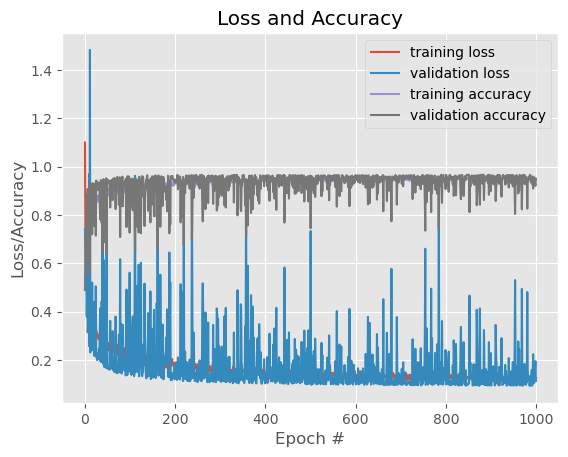

In [27]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()


<u>Glorot Uniform Initializer</u>

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 256)               9472      
                                                                 
 dense_23 (Dense)            (None, 128)               32896     
                                                                 
 dense_24 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 1.1214 - accuracy: 0.5292 - val_loss: 0.7200 - val_accuracy: 0.6447
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.6986 - accuracy: 0.6336 - val_loss: 0.4844 - val_accuracy: 0.8841
Epoch 3/1000
38/38 [==========

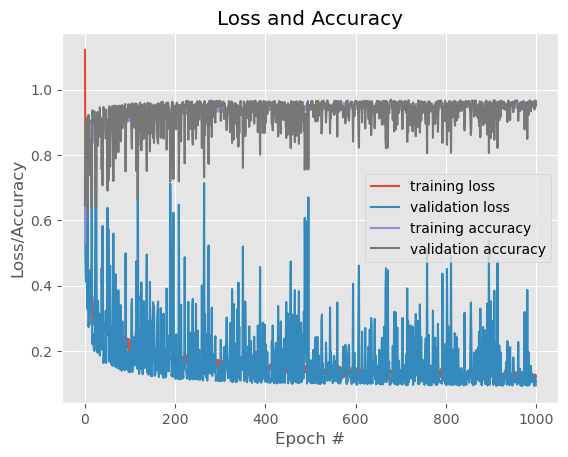

In [11]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dense(128, kernel_initializer = 'glorot_uniform'))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Glorot Normal Initializer</u>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               9472      
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 1.0764 - accuracy: 0.5518 - val_loss: 1.0940 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.7185 - accuracy: 0.6127 - val_loss: 0.8591 - val_accuracy: 0.5246
Epoch 3/1000
38/38 [=========

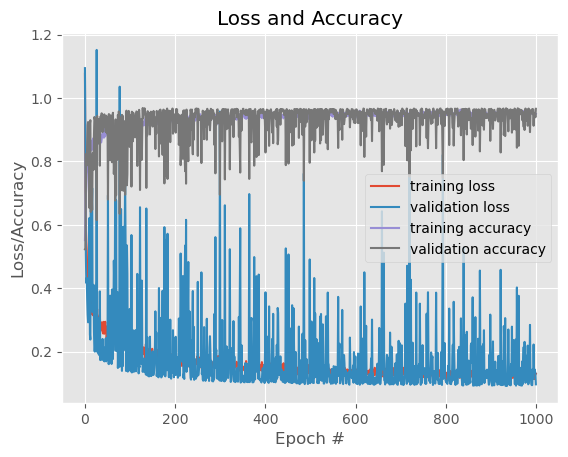

In [11]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, kernel_initializer = 'glorot_normal',input_shape=(36,)))
model.add(Dense(128, kernel_initializer = 'glorot_normal'))
model.add(Dense(2, kernel_initializer = 'glorot_normal', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>He Uniform Initializer</u>

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               9472      
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 dense_77 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 2.4286 - accuracy: 0.5409 - val_loss: 2.7326 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 1.3399 - accuracy: 0.6177 - val_loss: 2.3614 - val_accuracy: 0.5246
Epoch 3/1000
38/38 [=========

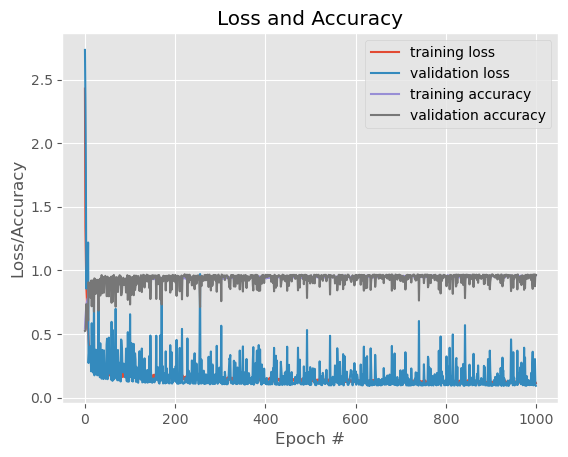

In [32]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, kernel_initializer = 'he_uniform', input_shape=(36,)))
model.add(Dense(128, kernel_initializer = 'he_uniform'))
model.add(Dense(2, kernel_initializer = 'he_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>He Normal Initializer</u>

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 256)               9472      
                                                                 
 dense_79 (Dense)            (None, 128)               32896     
                                                                 
 dense_80 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 2.5212 - accuracy: 0.5309 - val_loss: 2.0089 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 1.5879 - accuracy: 0.5301 - val_loss: 0.8477 - val_accuracy: 0.5880
Epoch 3/1000
38/38 [=========

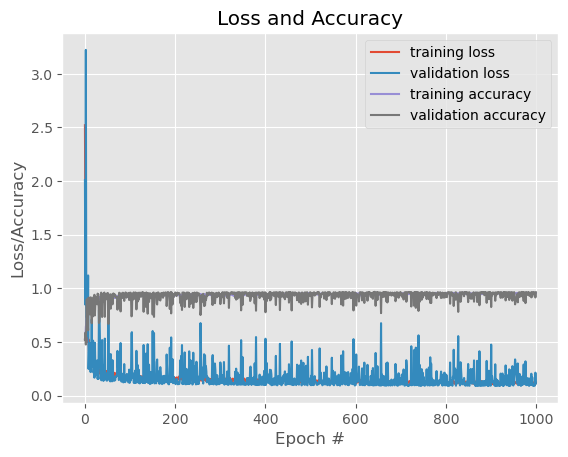

In [33]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, kernel_initializer='he_normal', input_shape=(36,)))
model.add(Dense(128, kernel_initializer='he_normal'))
model.add(Dense(2, kernel_initializer='he_normal', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Additional Hidden Layer</u>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 256)               9472      
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 2)                 130       
                                                                 
Total params: 50,754
Trainable params: 50,754
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 1.2240 - accuracy: 0.5459 - val_loss: 0.9057 - val_accuracy: 0.4771
Epoch 2/1000
38/38 [====================

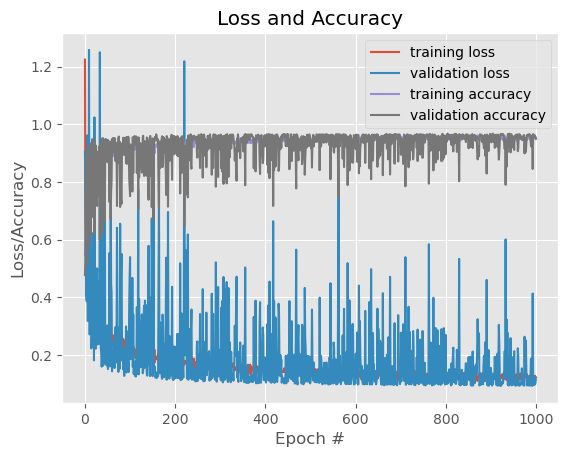

In [8]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, input_shape=(36,)))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Additional Neurons per Layer</u>

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               18944     
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 2)                 514       
                                                                 
Total params: 150,786
Trainable params: 150,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 1.5264 - accuracy: 0.5217 - val_loss: 0.9649 - val_accuracy: 0.5229
Epoch 2/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.7384 - accuracy: 0.5726 - val_loss: 1.0426 - val_accuracy: 0.4771
Epoch 3/1000
38/38 [=======

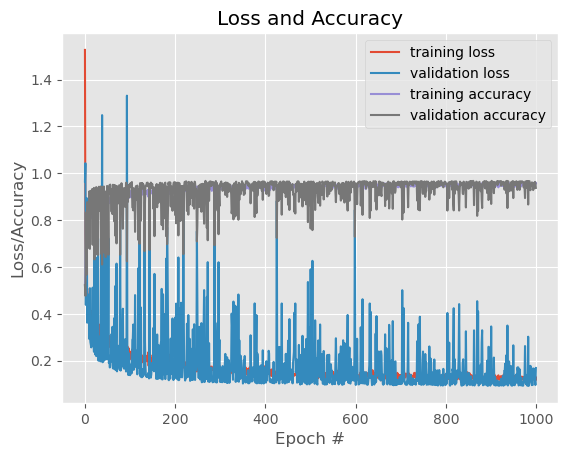

In [9]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(512, input_shape=(36,)))
model.add(Dense(256))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Additional Neurons per Layer as well as Additional Hidden Layer</u>

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 1024)              37888     
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 2)                 514       
                                                                 
Total params: 694,530
Trainable params: 694,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 2s 15ms/step - loss: 2.2347 - accuracy: 0.5860 - val_loss: 0.7137 - val_accuracy: 0.7373
Epoch 2/1000
38/38 [=================

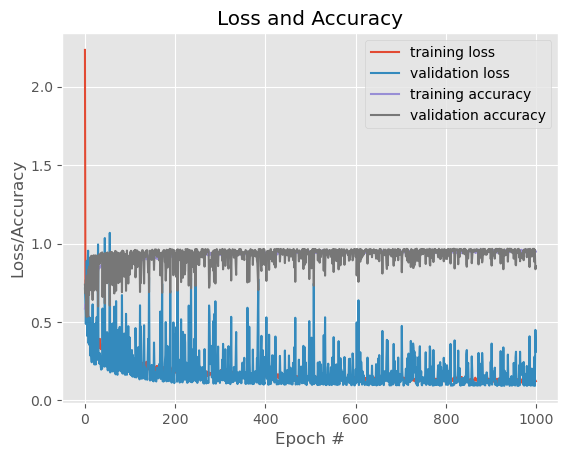

In [10]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(1024, input_shape=(36,)))
model.add(Dense(512))
model.add(Dense(256))
model.add(Dense(2, activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# print a summary of the model
model.summary()

# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)

print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

## Additional Runs with Combined Hyperparameters

<u>Tanh with Glorot Uniform, Sigmoid with Glorot Uniform, and Glorot Uniform</u>

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 256)               9472      
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.6851 - accuracy: 0.5710 - val_loss: 0.6810 - val_accuracy: 0.4812
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.6280 - accuracy: 0.6461 - val_loss: 0.5706 - val_accuracy: 0.7848
Epoch 3/1000
38/38 [==========

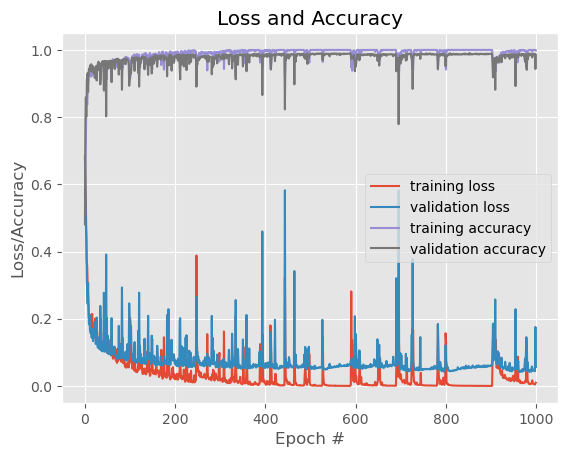

In [14]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_uniform',))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Relu with He Uniform, Sigmoid with Glorot Normal, and Glorot Normal</u>

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 256)               9472      
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.6633 - accuracy: 0.5927 - val_loss: 0.6008 - val_accuracy: 0.8040
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.7145 - val_loss: 0.6306 - val_accuracy: 0.5780
Epoch 3/1000
38/38 [=========

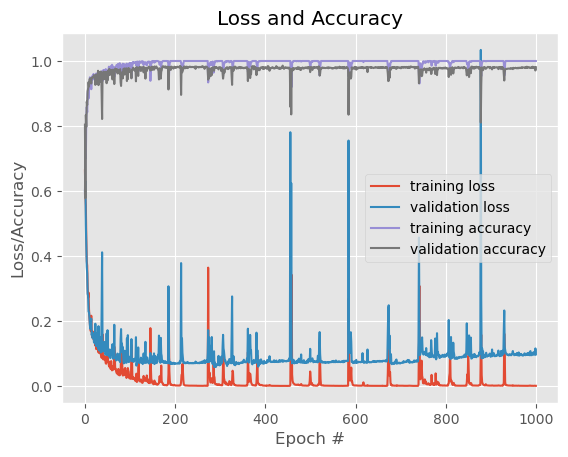

In [15]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_uniform',input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_normal'))
model.add(Dense(2, kernel_initializer = 'glorot_normal', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Relu with He Normal, Tanh with Glorot Normal, and Glorot Normal</u>

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 256)               9472      
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.6503 - accuracy: 0.6394 - val_loss: 0.5831 - val_accuracy: 0.6405
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.5162 - accuracy: 0.7721 - val_loss: 0.4473 - val_accuracy: 0.8649
Epoch 3/1000
38/38 [=========

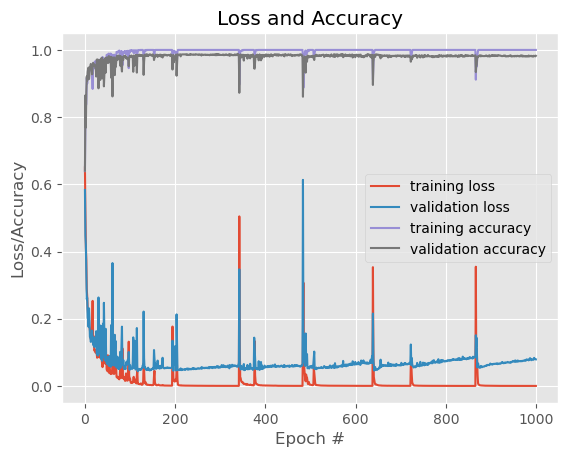

In [20]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'relu', kernel_initializer = 'he_normal',input_shape=(36,)))
model.add(Dense(128, activation = 'tanh', kernel_initializer = 'glorot_normal'))
model.add(Dense(2, kernel_initializer = 'glorot_normal', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Sigmoid with Glorot Uniform, Relu with He Uniform, and Glorot Uniform</u>

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 256)               9472      
                                                                 
 dense_53 (Dense)            (None, 128)               32896     
                                                                 
 dense_54 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 9ms/step - loss: 0.7026 - accuracy: 0.5342 - val_loss: 0.6751 - val_accuracy: 0.6831
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.6707 - accuracy: 0.6235 - val_loss: 0.6782 - val_accuracy: 0.5229
Epoch 3/1000
38/38 [=========

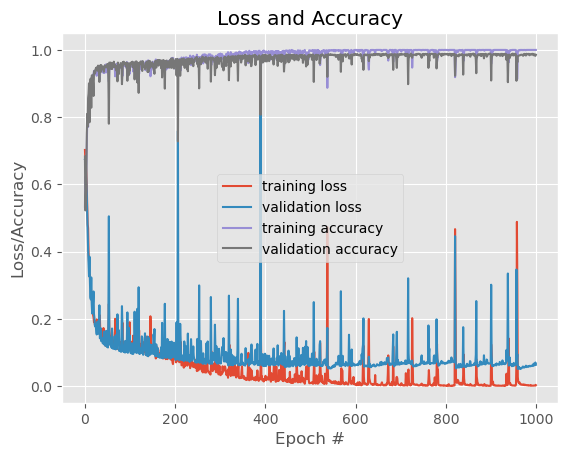

In [22]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'sigmoid', kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>L2 Regularization</u>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               9472      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 2.4865 - accuracy: 0.5484 - val_loss: 1.9085 - val_accuracy: 0.4771
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 1.5638 - accuracy: 0.6185 - val_loss: 1.2712 - val_accuracy: 0.5238
Epoch 3/1000
38/38 [===========

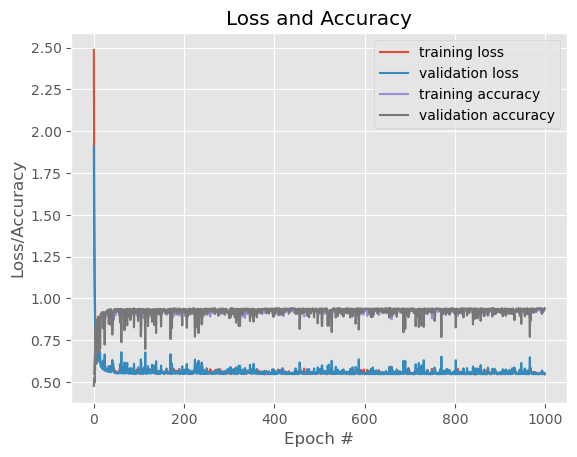

In [3]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', kernel_initializer = 'glorot_uniform', kernel_regularizer = 'l2',input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_uniform', kernel_regularizer = 'l2'))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid', kernel_regularizer = 'l2')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

<u>Dropout Regularization</u>

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 256)               9472      
                                                                 
 dense_41 (Dense)            (None, 128)               32896     
                                                                 
 dense_42 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [==============================] - 1s 10ms/step - loss: 2.4640 - accuracy: 0.5317 - val_loss: 1.8956 - val_accuracy: 0.5146
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 1.5653 - accuracy: 0.5559 - val_loss: 1.2744 - val_accuracy: 0.5771
Epoch 3/1000
38/38 [========

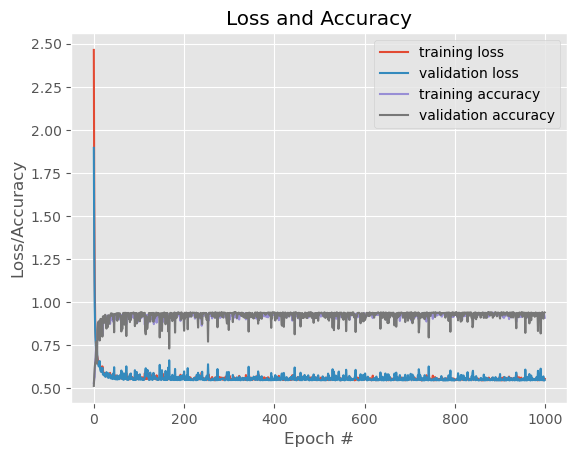

In [17]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', kernel_initializer = 'glorot_uniform', kernel_regularizer = 'l2',input_shape=(36,)))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_uniform', kernel_regularizer = 'l2'))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid', kernel_regularizer = 'l2')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 256)               9472      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 2)                 258       
                                                                 
Total params: 42,626
Trainable params: 42,626
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
38/38 [=============================

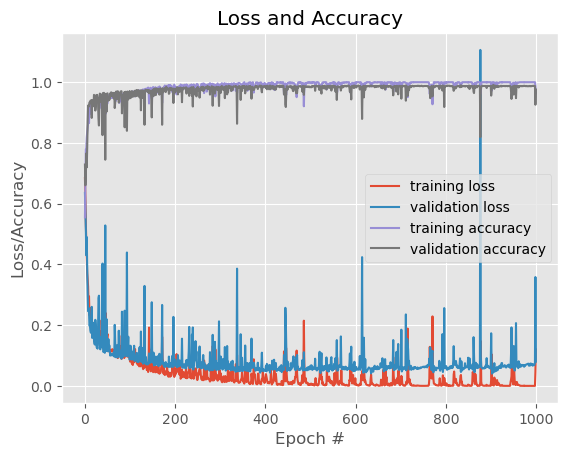

In [18]:
# Create a feedforward neural net
model = Sequential()

model.add(Dense(256, activation = 'tanh', kernel_initializer = 'glorot_uniform',input_shape=(36,)))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'sigmoid', kernel_initializer = 'glorot_uniform'))
model.add(Dropout(0.15))
model.add(Dense(2, kernel_initializer = 'glorot_uniform', activation = 'sigmoid')) #output layer

# compile the model by choosing how the optimizer works
model.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

# print a summary of the model
model.summary()


# fit the model to the training data
maxEpoch = 1000
H = model.fit(trainX, trainY, validation_data = (valX, valY), epochs = maxEpoch, batch_size = 32)
print('Test accuracy')

# predict posterior probability distribution for labels of the test set
predictedY = model.predict(testX)

# convert posterior probabilities to labels
predictedY = predictedY.argmax(axis = 1)
realY = testY.argmax(axis = 1)

# print classification report
print(classification_report(realY, predictedY))

# plot the loss and accuracy through training
plt.style.use('ggplot')
plt.figure()

plt.plot(range(maxEpoch), H.history['loss'], label = 'training loss')
plt.plot(range(maxEpoch), H.history['val_loss'], label = 'validation loss')
plt.plot(range(maxEpoch), H.history['accuracy'], label = 'training accuracy')
plt.plot(range(maxEpoch), H.history['val_accuracy'], label = 'validation accuracy')

plt.title('Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()